In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
X = df.drop("Potability",axis=1)  
y = df["Potability"] 

In [4]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((2293, 9), (983, 9))

In [7]:
X_train.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.091167,-0.094474,-0.026305,0.002701,0.018871,0.030163,0.015313,-0.069330
Hardness,0.091167,1.000000,-0.018052,-0.026504,-0.099338,-0.029264,-0.012594,-0.006824,-0.022753
Solids,-0.094474,-0.018052,1.000000,-0.075125,-0.200562,0.031440,0.006951,-0.027097,0.028570
Chloramines,-0.026305,-0.026504,-0.075125,1.000000,0.047557,-0.028918,-0.014465,0.035203,-0.002893
Sulfate,0.002701,-0.099338,-0.200562,0.047557,1.000000,-0.015048,0.046092,-0.041415,-0.005801
Conductivity,0.018871,-0.029264,0.031440,-0.028918,-0.015048,1.000000,0.013972,0.005611,-0.008656
Organic_carbon,0.030163,-0.012594,0.006951,-0.014465,0.046092,0.013972,1.000000,-0.017263,-0.039900
Trihalomethanes,0.015313,-0.006824,-0.027097,0.035203,-0.041415,0.005611,-0.017263,1.000000,-0.011551
Turbidity,-0.069330,-0.022753,0.028570,-0.002893,-0.005801,-0.008656,-0.039900,-0.011551,1.000000


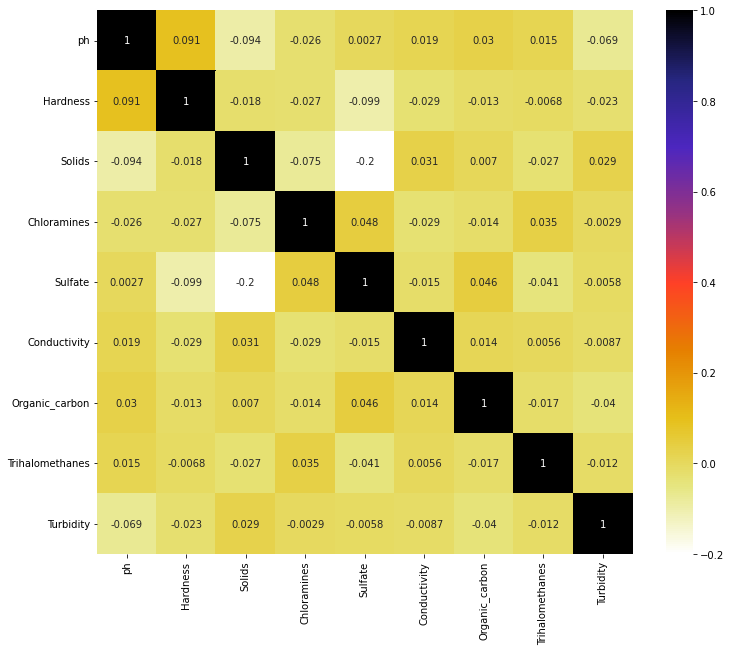

In [8]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train, 0.05)
len(set(corr_features))

5

In [13]:
corr_features

{'Chloramines', 'Hardness', 'Solids', 'Sulfate', 'Turbidity'}

In [16]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ph,Conductivity,Organic_carbon,Trihalomethanes
2017,8.111953,281.069203,13.027921,78.582094
2533,6.768060,461.530446,13.557381,60.571241
589,NaN,447.937123,10.461025,32.074863
482,7.705711,518.043369,10.638798,63.157489
2620,5.830542,494.154505,16.666613,69.580253
...,...,...,...,...
862,8.159667,459.541159,14.192544,60.373722
351,8.848586,479.791975,12.070444,77.671337
1248,NaN,468.939345,16.233039,67.873910
3103,5.967274,323.962695,12.651854,72.273590
